In this Project I intend confirming our hypothesis that distilBERT an optimised version of BERT is best suited for sentiment analysis of cryptocurrency based News headlines.

 I constructed a cryptocurrency based dictionary that is made of the top 200 crypto currencies and their abbreviations according to thier market capitalization. 192  crypto exchanges also made the list. This dictionary was then used to identify crypto currency entities from news headlines datasets and their sentiments determined using Textblob. Various BERT models were then trained and performance evaluated using this dataset. The best performing model would then be deployed for sentiments analysis in finance, particulary to crypto currency news headlines.

Finally a user interface is added to deploy the model for test/use



### Load Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
import string

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#This datasets is made up of crypto currency news headlines.
df =  pd.read_csv('data/scraped_news_headline.csv')
df.head()

,headline_news
0,Bitcoin miner Marathon Digital is mining Kaspa...
1,Cryptocurrencies waver as focus shifts to BitB...
2,"US government transfers 3,940 BTC worth $241 m..."
3,German’s BKA transfers more Bitcoin to exchang...
4,"Crypto Fear and Greed Index hits 30, lowest le..."


### Clean and tokenize the data

In [3]:

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove symbols (except alphanumeric)
    text = re.sub(r'[^\w]', ' ', text)
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    ## remove single characters eg 'k'
    text = re.sub(r"\b\w\b", "", text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


def preprocess_dataframe(df, text_column, new_column):
    df[new_column] = df[text_column].apply(preprocess_text)
    return df


In [4]:
df1 = preprocess_dataframe(df.copy(), 'headline_news','clean_tokens')
df1.head()

,headline_news,clean_tokens
0,Bitcoin miner Marathon Digital is mining Kaspa...,"[bitcoin, miner, marathon, digital, mining, ka..."
1,Cryptocurrencies waver as focus shifts to BitB...,"[cryptocurrencies, waver, focus, shifts, bitbo..."
2,"US government transfers 3,940 BTC worth $241 m...","[us, government, transfers, btc, worth, millio..."
3,German’s BKA transfers more Bitcoin to exchang...,"[german, bka, transfers, bitcoin, exchanges, i..."
4,"Crypto Fear and Greed Index hits 30, lowest le...","[crypto, fear, greed, index, hits, lowest, lev..."


### Carry out NER And Sentiment analysis

In [5]:
## join the tokenized data as strings
def join_tokens(tokens):
    # tokens contain a list of words
    return ' '.join(tokens)

df1['clean_headline'] = df1['clean_tokens'].apply(join_tokens)
df1.head()

,headline_news,clean_tokens,clean_headline
0,Bitcoin miner Marathon Digital is mining Kaspa...,"[bitcoin, miner, marathon, digital, mining, ka...",bitcoin miner marathon digital mining kaspa kas
1,Cryptocurrencies waver as focus shifts to BitB...,"[cryptocurrencies, waver, focus, shifts, bitbo...",cryptocurrencies waver focus shifts bitbot tok...
2,"US government transfers 3,940 BTC worth $241 m...","[us, government, transfers, btc, worth, millio...",us government transfers btc worth million coin...
3,German’s BKA transfers more Bitcoin to exchang...,"[german, bka, transfers, bitcoin, exchanges, i...",german bka transfers bitcoin exchanges includi...
4,"Crypto Fear and Greed Index hits 30, lowest le...","[crypto, fear, greed, index, hits, lowest, lev...",crypto fear greed index hits lowest level months


In [6]:
df_n = df1
df_n.head()

,headline_news,clean_tokens,clean_headline
0,Bitcoin miner Marathon Digital is mining Kaspa...,"[bitcoin, miner, marathon, digital, mining, ka...",bitcoin miner marathon digital mining kaspa kas
1,Cryptocurrencies waver as focus shifts to BitB...,"[cryptocurrencies, waver, focus, shifts, bitbo...",cryptocurrencies waver focus shifts bitbot tok...
2,"US government transfers 3,940 BTC worth $241 m...","[us, government, transfers, btc, worth, millio...",us government transfers btc worth million coin...
3,German’s BKA transfers more Bitcoin to exchang...,"[german, bka, transfers, bitcoin, exchanges, i...",german bka transfers bitcoin exchanges includi...
4,"Crypto Fear and Greed Index hits 30, lowest le...","[crypto, fear, greed, index, hits, lowest, lev...",crypto fear greed index hits lowest level months


In [8]:
!pip install spacy

In [ ]:
## testing spacy library for entity recognition
import spacy

In [10]:
# run this only once
!python -m spacy download en_core_web_sm

Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "c:\Users\HP\anaconda3\Lib\site-packages\spacy\__init__.py", line 6, in <module>
    from .errors import setup_default_warnings
  File "c:\Users\HP\anaconda3\Lib\site-packages\spacy\errors.py", line 3, in <module>
    from .compat import Literal
  File "c:\Users\HP\anaconda3\Lib\site-packages\spacy\compat.py", line 4, in <module>
    from thinc.util import copy_array
  File "c:\Users\HP\anaconda3\Lib\site-packages\thinc\__init__.py", line 5, in <module>
    from .config import registry
  File "c:\Users\HP\anaconda3\Lib\site-packages\thinc\config.py", line 5, in <module>
    from .types import Decorator
  File "c:\Users\HP\anaconda3\Lib\site-packages\thinc\types.py", line 25, in <module>
    from .compat import cupy, has_cupy
  File "c:\Users\HP\anaconda3\Lib\site-packages\t

In [ ]:
nlp = spacy.load("en_core_web_sm") ## load spacy small package
nlp

In [ ]:
doc = nlp("Donad Trump was President of USA")
doc

Donad Trump was President of USA

In [ ]:
doc.ents

(Donad Trump, USA)

In [ ]:
from spacy import displacy
displacy.render(doc, style="ent")

#### Test spacy on random rows in the dataset

In [ ]:
doc = nlp("bitcoin miner marathon digital mining kaspa kasA")
displacy.render(doc, style="ent")

In [ ]:
doc = nlp("german bka transfers bitcoin exchanges including kraken bitstamp")
displacy.render(doc, style="ent")

In [ ]:
doc = nlp("solana sol price prediction new solana meme coin launches tomorrow ")
displacy.render(doc, style="ent")

#### Using a manually created dictionary for crpto currency entity recognition

In [12]:
## import already created dictionary to aid recognition
import json
with open('C:/Users/HP/Desktop/TerdooNLP/Annotated Dictionary/annotataion_dict.json', 'r') as f:

    annotated_dict = json.load(f)

In [13]:
annotated_dict

{'bitcoin': 'CRYPTOCURRENCY',
 'marathon digital': 'COMPANY',
 'kaspa': 'CRYPTOCURRENCY',
 'cryptocurrencies': 'CRYPTOCURRENCY',
 'bitbot': 'CRYPTOCURRENCY',
 'btc': 'CRYPTOCURRENCY',
 'us': 'COUNTRY',
 'government': 'ENTITY',
 'coinbase': 'COMPANY',
 'german': 'COUNTRY',
 'bka': 'ENTITY',
 'crypto': 'CRYPTOCURRENCY',
 'fear and greed index': 'INDEX',
 'notcoin': 'CRYPTOCURRENCY',
 'usdc': 'CRYPTOCURRENCY',
 'first digital usd': 'CRYPTOCURRENCY',
 'shiba inu': 'CRYPTOCURRENCY',
 'tether usd': 'CRYPTOCURRENCY',
 'ethereum': 'CRYPTOCURRENCY',
 'bonk': 'CRYPTOCURRENCY',
 'floki': 'CRYPTOCURRENCY',
 'worldcoin': 'CRYPTOCURRENCY',
 'jasmycoin': 'CRYPTOCURRENCY',
 'jupiter': 'COMPANY',
 'lido dao token': 'CRYPTOCURRENCY',
 'sui network': 'CRYPTOCURRENCY',
 'bakerytoken': 'CRYPTOCURRENCY',
 'gala': 'CRYPTOCURRENCY',
 'bnb': 'CRYPTOCURRENCY',
 'open campus': 'CRYPTOCURRENCY',
 'yield guild games': 'CRYPTOCURRENCY',
 'aptos': 'CRYPTOCURRENCY',
 'beta finance': 'CRYPTOCURRENCY',
 'dydx token': '

In [14]:
## testing the dictionary for crypto recognition
import pandas as pd

# Provided dictionary above
entity_dict = annotated_dict

def ner_on_text(text, entity_dict):
  """
  Performs named entity recognition on a text string using a provided dictionary for individual words.

  Args:
      text (str): The text to analyze.
      entity_dict (dict): The dictionary with entity names as keys and their labels as values.

  Returns:
      list: A list of dictionaries containing entity information:
          - text: The text of the entity.
          - label: The label for the entity type as per the provided dictionary.
          - start_char: The starting character index of the entity in the text.
          - end_char: The ending character index (exclusive) of the entity in the text.
  """
  entities = []
  words = text.split()  # Split text into words

  for word in words:
    word_lower = word.lower()  # Convert word to lowercase for case-insensitive matching
    if word_lower in entity_dict:
      start = text.lower().find(word_lower)
      end = start + len(word)
      entities.append({
        "text": text[start:end],
        "label": entity_dict[word_lower],
        "start_char": start,
        "end_char": end,
      })

  return entities

def ner_on_dataframe(df, text_column, entity_dict):
  """
  Performs named entity recognition on a text column in a Pandas DataFrame using a provided dictionary for individual words.

  Args:
      df (pd.DataFrame): The DataFrame containing the text column.
      text_column (str): The name of the column containing the text data.
      entity_dict (dict): The dictionary with entity names as keys and their labels as values.

  Returns:
      pd.DataFrame: The DataFrame with a new column named "entities" containing
                   a list of dictionaries for each row with the extracted entities.
  """
  df["entities"] = df[text_column].apply(lambda text: ner_on_text(text, entity_dict))
  return df



In [15]:
## apply the above function on the clean_headline column to get recognized entities
df_n = ner_on_dataframe(df1.copy(), 'clean_headline', entity_dict)

df_n.head(30)

,headline_news,clean_tokens,clean_headline,entities
0,Bitcoin miner Marathon Digital is mining Kaspa...,"[bitcoin, miner, marathon, digital, mining, ka...",bitcoin miner marathon digital mining kaspa kas,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'..."
1,Cryptocurrencies waver as focus shifts to BitB...,"[cryptocurrencies, waver, focus, shifts, bitbo...",cryptocurrencies waver focus shifts bitbot tok...,"[{'text': 'cryptocurrencies', 'label': 'CRYPTO..."
2,"US government transfers 3,940 BTC worth $241 m...","[us, government, transfers, btc, worth, millio...",us government transfers btc worth million coin...,"[{'text': 'us', 'label': 'COUNTRY', 'start_cha..."
3,German’s BKA transfers more Bitcoin to exchang...,"[german, bka, transfers, bitcoin, exchanges, i...",german bka transfers bitcoin exchanges includi...,"[{'text': 'german', 'label': 'COUNTRY', 'start..."
4,"Crypto Fear and Greed Index hits 30, lowest le...","[crypto, fear, greed, index, hits, lowest, lev...",crypto fear greed index hits lowest level months,"[{'text': 'crypto', 'label': 'CRYPTOCURRENCY',..."
5,Donald Trump receives $2M Bitcoin donation fro...,"[donald, trump, receives, bitcoin, donation, w...",donald trump receives bitcoin donation winklev...,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'..."
6,Bitcoin stays above $65k as Bitbot unveils its...,"[bitcoin, stays, bitbot, unveils, mini, app, ui]",bitcoin stays bitbot unveils mini app ui,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'..."
7,Riot Platforms wants to buy Bitfarms for $950 ...,"[riot, platforms, wants, buy, bitfarms, million]",riot platforms wants buy bitfarms million,[]
8,Notcoin price soars after beating Bitcoin in v...,"[notcoin, price, soars, beating, bitcoin, vote...",notcoin price soars beating bitcoin vote post ...,"[{'text': 'notcoin', 'label': 'CRYPTOCURRENCY'..."
9,UK High Court Judge rules against Craig Wright...,"[uk, high, court, judge, rules, craig, wright,...",uk high court judge rules craig wright bitcoin...,"[{'text': 'high', 'label': 'CRYPTOCURRENCY', '..."


In [ ]:
df_n.to_csv('recognized_entity_dataset.csv', index= False) ## save the dataframe as a csv file

In [ ]:
# Count rows with empty lists (excluding None)
empty_list_count = df_n['entities'].apply(lambda x: x == []).sum()

empty_list = round(empty_list_count/len(df_n['entities']) *100, 2)
print(f'Percentage of rows with no recognized entities is : {empty_list}%')

Percentage of rows with no recognized entities is : 13.33%


#### Using textblob to get sentiments (Positive,Negative or Neutral) on the recognized entites

In [ ]:
## getting sentiments
import pandas as pd
from textblob import TextBlob

# Provided dictionary
entity_dict = entity_dict ## already declared above

def classify_sentiment(polarity):
    """
    Classifies sentiment polarity into positive, negative, or neutral.

    Args:
        polarity (float): The sentiment polarity.

    Returns:
        str: The sentiment classification ("positive", "negative", "neutral").
    """
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

def ner_with_sentiment(text, entity_dict):
    """
    Performs named entity recognition on a text string using a provided dictionary and
    classifies sentiment for the recognized entities based on the context in the headline.

    Args:
        text (str): The text to analyze.
        entity_dict (dict): The dictionary with entity names as keys and their labels as values.

    Returns:
        list: A list of dictionaries containing entity and sentiment information:
            - start_char: The starting character index of the entity in the text.
            - end_char: The ending character index (exclusive) of the entity in the text.
            - entity: The text of the entity.
            - label: The label for the entity type as per the provided dictionary.
            - sentiment: The classified sentiment of the context around the entity.
    """
    entities_with_sentiment = []
    words = text.split()  # Split text into words

    for word in words:
        word_lower = word.lower()  # Convert word to lowercase for case-insensitive matching
        if word_lower in entity_dict:
            start = text.lower().find(word_lower)
            end = start + len(word)

            # Extract context around the entity for sentiment analysis
            context = text[max(0, start - 50):min(len(text), end + 50)]
            sentiment_polarity = TextBlob(context).sentiment.polarity
            sentiment = classify_sentiment(sentiment_polarity)

            entities_with_sentiment.append({
                "start_char": start,
                "end_char": end,
                "entity": text[start:end],
                "label": entity_dict[word_lower],
                "sentiment": sentiment,
            })

    return entities_with_sentiment

def ner_with_sentiment_on_dataframe(df, text_column, entity_dict):
    """
    Performs named entity recognition with sentiment analysis on a text column in a Pandas DataFrame
    using a provided dictionary.

    Args:
        df (pd.DataFrame): The DataFrame containing the text column.
        text_column (str): The name of the column containing the text data.
        entity_dict (dict): The dictionary with entity names as keys and their labels as values.

    Returns:
        pd.DataFrame: The DataFrame with a new column named "sentiments" containing
                    a list of dictionaries for each row with the extracted entities and their sentiments.
    """
    df["sentiments"] = df[text_column].apply(lambda text: ner_with_sentiment(text, entity_dict))
    return df


In [ ]:
## calling the funtion on clean_headline column
df_with_sentiments = ner_with_sentiment_on_dataframe(df_n, "clean_headline", entity_dict)
print('done')


done


In [ ]:
df_with_sentiments.to_csv('entity+sentiment_dataset.csv', index = False) ## save the dataframe as a csv file

In [ ]:
df_with_sentiments

,headline_news,clean_tokens,clean_headline,entities,sentiments
0,Bitcoin miner Marathon Digital is mining Kaspa...,"[bitcoin, miner, marathon, digital, mining, ka...",bitcoin miner marathon digital mining kaspa kas,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'...","[{'start_char': 0, 'end_char': 7, 'entity': 'b..."
1,Cryptocurrencies waver as focus shifts to BitB...,"[cryptocurrencies, waver, focus, shifts, bitbo...",cryptocurrencies waver focus shifts bitbot tok...,"[{'text': 'cryptocurrencies', 'label': 'CRYPTO...","[{'start_char': 0, 'end_char': 16, 'entity': '..."
2,"US government transfers 3,940 BTC worth $241 m...","[us, government, transfers, btc, worth, millio...",us government transfers btc worth million coin...,"[{'text': 'us', 'label': 'COUNTRY', 'start_cha...","[{'start_char': 0, 'end_char': 2, 'entity': 'u..."
3,German’s BKA transfers more Bitcoin to exchang...,"[german, bka, transfers, bitcoin, exchanges, i...",german bka transfers bitcoin exchanges includi...,"[{'text': 'german', 'label': 'COUNTRY', 'start...","[{'start_char': 0, 'end_char': 6, 'entity': 'g..."
4,"Crypto Fear and Greed Index hits 30, lowest le...","[crypto, fear, greed, index, hits, lowest, lev...",crypto fear greed index hits lowest level months,"[{'text': 'crypto', 'label': 'CRYPTOCURRENCY',...","[{'start_char': 0, 'end_char': 6, 'entity': 'c..."
...,...,...,...,...,...
2336,bitcoin breaks below 39000 as post etf tumble ...,"[bitcoin, breaks, post, etf, tumble, continues]",bitcoin breaks post etf tumble continues,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'...","[{'start_char': 0, 'end_char': 7, 'entity': 'b..."
2337,new details emerge about secs x account hack i...,"[new, details, emerge, secs, account, hack, in...",new details emerge secs account hack including...,[],[]
2338,bitcoin briefly dips below 40000 for the first...,"[bitcoin, briefly, dips, first, time, year]",bitcoin briefly dips first time year,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'...","[{'start_char': 0, 'end_char': 7, 'entity': 'b..."
2339,bitcoins post etf sell off continues testing s...,"[bitcoins, post, etf, sell, continues, testing...",bitcoins post etf sell continues testing suppo...,"[{'text': 'crypto', 'label': 'CRYPTOCURRENCY',...","[{'start_char': 49, 'end_char': 55, 'entity': ..."


In [ ]:
df_with_sentiments.head(2)

,headline_news,clean_tokens,clean_headline,entities,sentiments
0,Bitcoin miner Marathon Digital is mining Kaspa...,"[bitcoin, miner, marathon, digital, mining, ka...",bitcoin miner marathon digital mining kaspa kas,"[{'text': 'bitcoin', 'label': 'CRYPTOCURRENCY'...","[{'start_char': 0, 'end_char': 7, 'entity': 'b..."
1,Cryptocurrencies waver as focus shifts to BitB...,"[cryptocurrencies, waver, focus, shifts, bitbo...",cryptocurrencies waver focus shifts bitbot tok...,"[{'text': 'cryptocurrencies', 'label': 'CRYPTO...","[{'start_char': 0, 'end_char': 16, 'entity': '..."


In [ ]:
# prompt: save this dataframe "df_with_sentiments" in a csv

df_with_sentiments.to_csv('df_with_sentiments.csv', index=False)


In [ ]:
# prompt: save this dataframe "df_with_sentiments" in a csv and save it for me

from google.colab import files
df_with_sentiments.to_csv('df_with_sentiments.csv', index=False)
files.download('df_with_sentiments.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Prediction Model

In [ ]:
## load libraries and data

import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader  ## for dataset preparation
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, DistilBertTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load datasets
file_path = '/content/ner+sentiment_textblob.csv' ## change to your file location
df = pd.read_csv(file_path)

with open('/content/annotataion_dict.json', 'r') as f:  ## change to your file location
    annotated_dict = json.load(f)

# Extract necessary columns and convert sentiments to list of dictionaries
data = df[['clean_headline', 'sentiments']].copy()
data['sentiments'] = data['sentiments'].apply(lambda x: json.loads(x.replace("'", "\"")))

# Initialize the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Custom dataset class to prepare dataset using PyTorch Dataset class, which provides a standard interface for loading and preprocessing data
class SentimentDataset(Dataset):
    def __init__(self, headlines, sentiments, tokenizer):
        self.headlines = headlines
        self.sentiments = sentiments
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, idx):
        tokens = self.tokenizer(self.headlines[idx], padding='max_length', max_length=128, truncation=True, return_tensors="pt")
        input_ids = tokens['input_ids'].squeeze()
        attention_mask = tokens['attention_mask'].squeeze()
        label = self._get_sentiment_label(self.sentiments[idx])
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': torch.tensor(label, dtype=torch.long)}

    def _get_sentiment_label(self, sentiments):
        if any(sent['sentiment'] == 'positive' for sent in sentiments):
            return 2  # Positive
        elif any(sent['sentiment'] == 'negative' for sent in sentiments):
            return 0  # Negative
        else:
            return 1  # Neutral

# Prepare data
train_headlines, val_headlines, train_sentiments, val_sentiments = train_test_split(data['clean_headline'], data['sentiments'], test_size=0.2, random_state=42)

train_dataset = SentimentDataset(train_headlines.tolist(), train_sentiments.tolist(), tokenizer)
val_dataset = SentimentDataset(val_headlines.tolist(), val_sentiments.tolist(), tokenizer)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Load the model
# model finetuning section
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Move model to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define compute metrics function
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='macro')
    acc = accuracy_score(labels, pred)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=7,  # Increase the number of epochs
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    report_to="none"  # Disable logging to external services
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()

# Evaluate the model
evaluation_metrics = trainer.evaluate()

# Print evaluation metrics
print("Evaluation metrics:", evaluation_metrics)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.713400,0.686671,0.729211,0.281134,0.243070,0.333333
2,0.545600,0.563804,0.759062,0.428290,0.738177,0.420191
3,0.362500,0.428192,0.829424,0.692061,0.777329,0.692499
4,0.240100,0.411870,0.863539,0.780867,0.786888,0.779901
5,0.208900,0.533787,0.876333,0.787779,0.837971,0.751466
6,0.097200,0.682505,0.874200,0.777412,0.825468,0.755056
7,0.011900,0.633633,0.882729,0.800869,0.828121,0.780040


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation metrics: {'eval_loss': 0.6336331367492676, 'eval_accuracy': 0.8827292110874201, 'eval_f1': 0.8008689365225551, 'eval_precision': 0.828121412499426, 'eval_recall': 0.7800403787245892, 'eval_runtime': 1.8797, 'eval_samples_per_second': 249.513, 'eval_steps_per_second': 15.96, 'epoch': 7.0}


In [ ]:
# Save the trained model
model_save_path = './results/sentiment_model6'
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

# Load the trained model and tokenizer
model = DistilBertForSequenceClassification.from_pretrained(model_save_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_save_path)

# Local entity dictionary
entity_dict = annotated_dict

# Function to recognize entities using the locally defined dictionary
def recognize_entities(headline, entity_dict):
    entities = []
    words = headline.split()
    for word in words:
        word_lower = word.lower()
        if word_lower in entity_dict:
            entities.append((word, entity_dict[word_lower]))
    return entities


In [ ]:
## predicting sentiments using fine-tuned model and locally defined dictionary
def predict_sentiment_and_entities(model, tokenizer, entity_dict, headlines):
  model.eval()  # Set the model to evaluation mode
  results = []

  for headline in headlines:
    entities = recognize_entities(headline, entity_dict)
    if not entities:
      continue

    # Process the entire headline with all entities
    headline_results = {
      # 'headline': headline,
      'entities': []
    }
    for entity, label in entities:
      context = headline  # Using the entire headline as context

      inputs = tokenizer(context, padding='max_length', max_length=128, truncation=True, return_tensors="pt")
      input_ids = inputs['input_ids']
      attention_mask = inputs['attention_mask']

      with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1).item()
        sentiment = 'positive' if predicted_class == 2 else 'negative' if predicted_class == 0 else 'neutral'

      headline_results['entities'].append({
        'entity': entity,
        'label': label,
        'sentiment': sentiment
      })

    results.append(headline_results)

  return results


In [ ]:
# Sample news headlines to test model
test_headlines = [
    "Bitcoin surges to new all-time high",
    "US government cracks down on cryptocurrency fraud",
    "Crypto market faces severe downturn amid economic concerns",
    "New regulations boost investor confidence in crypto"
]

# Predict sentiments and entities
results = predict_sentiment_and_entities(model, tokenizer, entity_dict, test_headlines)

# Print the results
for result in results:
    print(result)


{'entities': [{'entity': 'Bitcoin', 'label': 'CRYPTOCURRENCY', 'sentiment': 'neutral'}, {'entity': 'high', 'label': 'CRYPTOCURRENCY', 'sentiment': 'neutral'}]}
{'entities': [{'entity': 'US', 'label': 'COUNTRY', 'sentiment': 'negative'}, {'entity': 'government', 'label': 'ENTITY', 'sentiment': 'negative'}]}
{'entities': [{'entity': 'Crypto', 'label': 'CRYPTOCURRENCY', 'sentiment': 'negative'}]}
{'entities': [{'entity': 'crypto', 'label': 'CRYPTOCURRENCY', 'sentiment': 'positive'}]}


### Model Comparison

In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments, DistilBertTokenizer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load dataset
file_path = '/content/ner+sentiment_textblob.csv' ## change to your file location
df = pd.read_csv(file_path)

with open('/content/annotataion_dict.json', 'r') as f:  ## change to your file location
    annotated_dict = json.load(f)

# Extract necessary columns and convert sentiments to list of dictionaries
data = df[['clean_headline', 'sentiments']].copy()
data['sentiments'] = data['sentiments'].apply(lambda x: json.loads(x.replace("'", "\"")))

# Initialize the DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Custom dataset class
class SentimentDataset(Dataset):
    def __init__(self, headlines, sentiments, tokenizer):
        self.headlines = headlines
        self.sentiments = sentiments
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, idx):
        tokens = self.tokenizer(self.headlines[idx], padding='max_length', max_length=128, truncation=True, return_tensors="pt")
        input_ids = tokens['input_ids'].squeeze()
        attention_mask = tokens['attention_mask'].squeeze()
        label = self._get_sentiment_label(self.sentiments[idx])
        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': torch.tensor(label, dtype=torch.long)}

    def _get_sentiment_label(self, sentiments):
        if any(sent['sentiment'] == 'positive' for sent in sentiments):
            return 2  # Positive
        elif any(sent['sentiment'] == 'negative' for sent in sentiments):
            return 0  # Negative
        else:
            return 1  # Neutral

# Prepare data
train_headlines, val_headlines, train_sentiments, val_sentiments = train_test_split(data['clean_headline'], data['sentiments'], test_size=0.2, random_state=42)

train_dataset = SentimentDataset(train_headlines.tolist(), train_sentiments.tolist(), tokenizer)
val_dataset = SentimentDataset(val_headlines.tolist(), val_sentiments.tolist(), tokenizer)

In [ ]:
import torch
from transformers import Trainer, TrainingArguments, DistilBertForSequenceClassification, BertForSequenceClassification, RobertaForSequenceClassification
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np

def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='macro')
    acc = accuracy_score(labels, pred)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

def train_and_log_model(model_name, model_class, train_dataset, val_dataset, num_labels=3, num_epochs=5):
    # Load the model
    model = model_class.from_pretrained(model_name, num_labels=num_labels)

    # Move model to GPU if available
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.to(device)

    # Set up training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=7,  # Increase the number of epochs
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        evaluation_strategy="epoch",  # Evaluate at the end of each epoch
        report_to="none",  # Disable logging to external services
        learning_rate=1e-5  # Set learning rate to 1e-5
    )

    # Initialize the Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    train_result = trainer.train()

    # Evaluate the model
    eval_result = trainer.evaluate()

    return train_result, eval_result, trainer



In [ ]:
results = {} ## dictionary to hold validation metrics

results['distilbert'] = train_and_log_model('distilbert-base-uncased', DistilBertForSequenceClassification, train_dataset, val_dataset)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.793700,0.772200,0.729211,0.281134,0.243070,0.333333
2,0.739600,0.769676,0.729211,0.281134,0.243070,0.333333
3,0.630000,0.714896,0.729211,0.281134,0.243070,0.333333
4,0.568600,0.624327,0.731343,0.310495,0.388167,0.347257
5,0.585700,0.628812,0.729211,0.281134,0.243070,0.333333
6,0.580700,0.633555,0.729211,0.281134,0.243070,0.333333
7,0.547200,0.646008,0.729211,0.281134,0.243070,0.333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results['bert'] = train_and_log_model('bert-base-uncased', BertForSequenceClassification, train_dataset, val_dataset)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.788000,0.751982,0.729211,0.281134,0.243070,0.333333
2,0.724300,0.753652,0.729211,0.281134,0.243070,0.333333
3,0.600700,0.749046,0.729211,0.281134,0.243070,0.333333
4,0.581700,0.639212,0.729211,0.281134,0.243070,0.333333
5,0.593900,0.632025,0.718550,0.288889,0.274845,0.332694
6,0.617100,0.631058,0.729211,0.281134,0.243070,0.333333
7,0.589300,0.633655,0.729211,0.281134,0.243070,0.333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results['roberta'] = train_and_log_model('roberta-base', RobertaForSequenceClassification, train_dataset, val_dataset)


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.790300,0.771747,0.729211,0.281134,0.243070,0.333333
2,0.727900,0.759555,0.729211,0.281134,0.243070,0.333333
3,0.601200,0.693383,0.729211,0.281134,0.243070,0.333333
4,0.637200,0.683147,0.724947,0.280181,0.242684,0.331384
5,0.589400,0.657054,0.729211,0.281134,0.243070,0.333333
6,0.603900,0.618976,0.729211,0.281134,0.243070,0.333333
7,0.560700,0.616330,0.739872,0.383522,0.733938,0.394236


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
results['finbert'] = train_and_log_model('yiyanghkust/finbert-tone', BertForSequenceClassification, train_dataset, val_dataset)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.893400,0.992857,0.729211,0.281134,0.243070,0.333333
2,0.795400,0.756696,0.716418,0.360239,0.361691,0.379282
3,0.691700,0.809267,0.675906,0.414850,0.381705,0.498886
4,0.537700,0.632264,0.733475,0.552560,0.573959,0.544551
5,0.671300,0.637701,0.729211,0.392901,0.629004,0.388950
6,0.404700,0.657683,0.695096,0.514380,0.508110,0.523022
7,0.357200,0.680558,0.731343,0.530815,0.541379,0.522491


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results

[{'entities': [{'entity': 'Bitcoin',
    'label': 'CRYPTOCURRENCY',
    'sentiment': 'neutral'},
   {'entity': 'high', 'label': 'CRYPTOCURRENCY', 'sentiment': 'neutral'}]},
 {'entities': [{'entity': 'US', 'label': 'COUNTRY', 'sentiment': 'negative'},
   {'entity': 'government', 'label': 'ENTITY', 'sentiment': 'negative'}]},
 {'entities': [{'entity': 'Crypto',
    'label': 'CRYPTOCURRENCY',
    'sentiment': 'negative'}]},
 {'entities': [{'entity': 'crypto',
    'label': 'CRYPTOCURRENCY',
    'sentiment': 'positive'}]}]

In [ ]:
## save the results from above to a dataframe
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate


data = []
for model_name, (train_output, eval_metrics, trainer) in results.items():
    data.append([
        model_name,
        eval_metrics['eval_accuracy'],
        eval_metrics['eval_f1'],
        eval_metrics['eval_precision'],
        eval_metrics['eval_recall']
    ])

# Create a DataFrame
df_eval = pd.DataFrame(data, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

# Print the table
print(tabulate(df_eval, headers='keys', tablefmt='pretty'))



+---+------------+--------------------+---------------------+---------------------+--------------------+
|   |   Model    |      Accuracy      |      F1 Score       |      Precision      |       Recall       |
+---+------------+--------------------+---------------------+---------------------+--------------------+
| 0 | distilbert | 0.7292110874200426 |  0.281134401972873  | 0.24307036247334754 | 0.3333333333333333 |
| 1 |    bert    | 0.7292110874200426 |  0.281134401972873  | 0.24307036247334754 | 0.3333333333333333 |
| 2 |  roberta   | 0.7398720682302772 | 0.38352162949864105 | 0.7339380196523053  | 0.3942364592035645 |
| 3 |  finbert   | 0.7313432835820896 | 0.5308152716248367  | 0.5413792949396664  | 0.5224911236424394 |
+---+------------+--------------------+---------------------+---------------------+--------------------+


In [ ]:
## LSTM Finetune
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Load dataset
file_path = '/content/ner+sentiment_textblob.csv' ## change to your file location
df = pd.read_csv(file_path)

with open('/content/annotataion_dict.json', 'r') as f:  ## change to your file location
    annotated_dict = json.load(f)

# Extract necessary columns and convert sentiments to list of dictionaries
data = df[['clean_headline', 'sentiments']].copy()
data['sentiments'] = data['sentiments'].apply(lambda x: json.loads(x.replace("'", "\"")))

# Define a simple tokenizer (assuming words are separated by spaces)
def simple_tokenizer(text):
    return text.split()

# Build vocabulary
vocab = set()
for headline in data['clean_headline']:
    vocab.update(simple_tokenizer(headline))
vocab = {word: idx for idx, word in enumerate(vocab)}

# Convert text to sequences of indices
def text_to_sequence(text, vocab):
    return [vocab[word] for word in simple_tokenizer(text) if word in vocab]

# Convert the dataset
class TextDataset(Dataset):
    def __init__(self, headlines, sentiments, vocab, max_length=128):
        self.headlines = headlines
        self.sentiments = sentiments
        self.vocab = vocab
        self.max_length = max_length

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, idx):
        sequence = text_to_sequence(self.headlines[idx], self.vocab)
        sequence = sequence[:self.max_length] + [0] * (self.max_length - len(sequence))  # Padding
        label = self._get_sentiment_label(self.sentiments[idx])
        return {'input_ids': torch.tensor(sequence, dtype=torch.long), 'labels': torch.tensor(label, dtype=torch.long)}

    def _get_sentiment_label(self, sentiments):
        if any(sent['sentiment'] == 'positive' for sent in sentiments):
            return 2  # Positive
        elif any(sent['sentiment'] == 'negative' for sent in sentiments):
            return 0  # Negative
        else:
            return 1  # Neutral

# Prepare data
train_headlines, val_headlines, train_sentiments, val_sentiments = train_test_split(data['clean_headline'], data['sentiments'], test_size=0.2, random_state=42)
train_dataset = TextDataset(train_headlines.tolist(), train_sentiments.tolist(), vocab)
val_dataset = TextDataset(val_headlines.tolist(), val_sentiments.tolist(), vocab)


In [ ]:
# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        lstm_out, _ = self.lstm(embedded)
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((lstm_out[:, -1, :self.lstm.hidden_size], lstm_out[:, 0, self.lstm.hidden_size:]), dim=1))
        else:
            hidden = self.dropout(lstm_out[:, -1, :])
        output = self.fc(hidden)
        return output

# Hyperparameters
VOCAB_SIZE = len(vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 256
OUTPUT_DIM = 3
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

# Instantiate the model
model = LSTMModel(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
# Training loop
def train_model(model, train_dataset, val_dataset, criterion, optimizer, epochs=5, batch_size=16):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    for epoch in range(epochs):
        model.train()  # Ensure model is in training mode
        total_loss = 0
        for batch in train_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            optimizer.zero_grad()
            predictions = model(input_ids)
            loss = criterion(predictions, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        val_loss, val_acc, val_precision, val_recall, val_f1 = evaluate_model(model, val_loader, criterion)
        print(f"Epoch: {epoch+1}, Training Loss: {total_loss/len(train_loader):.4f}, Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}")

# Evaluation function
def evaluate_model(model, val_loader, criterion):
    model.eval()  # Ensure model is in evaluation mode
    total_loss = 0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            labels = batch['labels'].to(device)

            predictions = model(input_ids)
            loss = criterion(predictions, labels)
            total_loss += loss.item()

            pred_classes = predictions.argmax(dim=1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(pred_classes.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    return avg_loss, accuracy, precision, recall, f1

# Train the model
train_model(model, train_dataset, val_dataset, criterion, optimizer, epochs=7, batch_size=16)

Epoch: 1, Training Loss: 0.3655, Validation Loss: 0.6163, Accuracy: 0.7761, Precision: 0.6492, Recall: 0.5427, F1 Score: 0.5750
Epoch: 2, Training Loss: 0.3502, Validation Loss: 0.6521, Accuracy: 0.7399, Precision: 0.5674, Recall: 0.5271, F1 Score: 0.5286
Epoch: 3, Training Loss: 0.2994, Validation Loss: 0.6645, Accuracy: 0.7633, Precision: 0.6098, Recall: 0.5500, F1 Score: 0.5728
Epoch: 4, Training Loss: 0.2802, Validation Loss: 0.6620, Accuracy: 0.7505, Precision: 0.6025, Recall: 0.5910, F1 Score: 0.5957
Epoch: 5, Training Loss: 0.2389, Validation Loss: 0.7172, Accuracy: 0.7399, Precision: 0.5849, Recall: 0.5520, F1 Score: 0.5662
Epoch: 6, Training Loss: 0.2340, Validation Loss: 0.8032, Accuracy: 0.7633, Precision: 0.6380, Recall: 0.5331, F1 Score: 0.5621
Epoch: 7, Training Loss: 0.1941, Validation Loss: 0.6994, Accuracy: 0.7676, Precision: 0.6207, Recall: 0.5901, F1 Score: 0.6023


In [ ]:
## add the metrics from LSTM to the dataframe holding the results
# New data to add
new_data = {'Model': 'LSTM', 'Accuracy': 0.7441, 'Precision': 0.7398, 'Recall': 0.4336, 'F1 Score': 0.4394}  ## edit to your results

# Create a new DataFrame with the new data
new_row = pd.DataFrame([new_data])

# Append the new row to the existing DataFrame
df_eval = pd.concat([df_eval,new_row], ignore_index=True)

df_eval

,Model,Accuracy,F1 Score,Precision,Recall
0,distilbert,0.729211,0.281134,0.243070,0.333333
1,bert,0.729211,0.281134,0.243070,0.333333
2,roberta,0.739872,0.383522,0.733938,0.394236
3,finbert,0.731343,0.530815,0.541379,0.522491
4,LSTM,0.744100,0.439400,0.739800,0.433600


In [ ]:
!pip install tabulate


In [ ]:
# Print the table
import pandas as pd
from tabulate import tabulate
print(tabulate(df_eval, headers='keys', tablefmt='pretty'))

+---+------------+--------------------+---------------------+---------------------+--------------------+
|   |   Model    |      Accuracy      |      F1 Score       |      Precision      |       Recall       |
+---+------------+--------------------+---------------------+---------------------+--------------------+
| 0 | distilbert | 0.7292110874200426 |  0.281134401972873  | 0.24307036247334754 | 0.3333333333333333 |
| 1 |    bert    | 0.7292110874200426 |  0.281134401972873  | 0.24307036247334754 | 0.3333333333333333 |
| 2 |  roberta   | 0.7398720682302772 | 0.38352162949864105 | 0.7339380196523053  | 0.3942364592035645 |
| 3 |  finbert   | 0.7313432835820896 | 0.5308152716248367  | 0.5413792949396664  | 0.5224911236424394 |
| 4 |    LSTM    |       0.7441       |       0.4394        |       0.7398        |       0.4336       |
+---+------------+--------------------+---------------------+---------------------+--------------------+


### Plot to show comparison

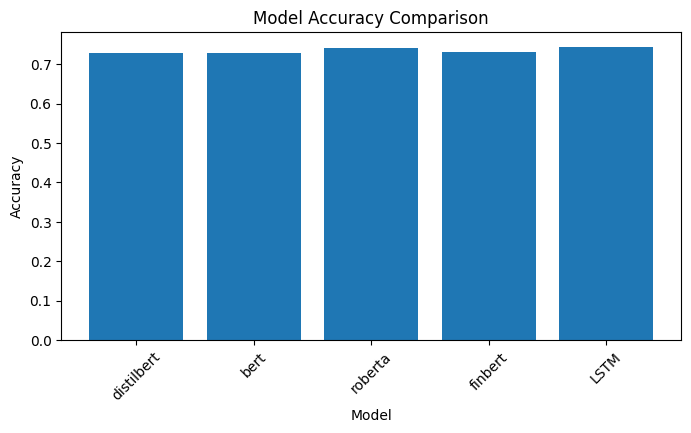

In [ ]:
## compare accuracy
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

plt.bar(df_eval['Model'], df_eval['Accuracy']) # Create the bar plot
# Set the title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.show()


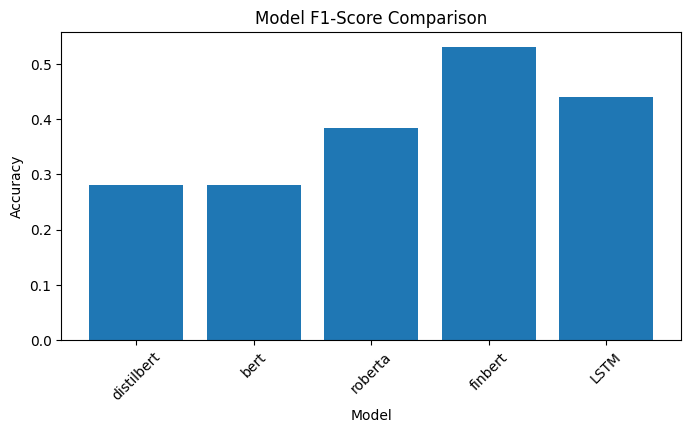

In [ ]:
## compare f1 score
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4)) # Set the figure size

# Create the bar plot
plt.bar(df_eval['Model'], df_eval['F1 Score'])
# Set the title and labels
plt.title('Model F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.show()
